Given a function $y(t) = -by(t) + \cfrac{cy(t-\tau)}{1+ y^{10} (t- \tau)}$
defining a Mackay-Glass time serie  

We initialise at $t_0$

$b= 0.1$  
$c = 0.2$  
$\tau = 17$  

The 18 first values of $y$ are given by:  
$y = [0.9697 0.9699 0.9794 1.0003 1.0319 1.0703 1.1076 1.1352 1.1485 1.1482 1.1383 1.1234 1.1072 1.0928 1.0820 1.0756 1.0739 1.0759]$  

$N$ is the size of the dataset of $t$ continous times defined in seconds, so $t_0 = 1$, we define the elements of N as $\{t_0, t_1, t_2...t_n\} \ \forall \ i \in \{0, 699\}$.  
In our case we will consider $N=700$, so the $n$ steps iterate from $0$ to $699$ in python.  

Propose a recursive equation for computing $y(t)$.   
To define the recursive equation we have to find the values of y at points in time (dicrete values of N).  
Approximating by finite difference we find:

$$y(t) = \cfrac{dy(t)}{dt} = \varDelta t \approx 1$$    
We defined $t_0$ =1 (first step of the algorithm)  

Taking the approximation by finite differente of $y(t)$ we get  
$$\cfrac{dy(t)}{dt} = \cfrac{y(t) - y(t-1)}{1}$$   
Because $\varDelta t_n = 1$ we can discretise $t$ as $$t = \varDelta t_n*n = n$$

Replacing $t$ by $n$ we get $$\cfrac{y(n) - y(n-1)}{1}=\cfrac{y(n + 1) - y(n)}{1}$$


So the equation we are interested in to write the code is:  

$$\boxed{y(n + 1) = y(n) -by(n) + \cfrac{cy(n-\tau)}{1+ y^{10} (n- \tau)}}$$   
$$\boxed{\ which \ is \ only \ defined \ for \ n \geqslant 18}$$

Generate the corresponding time serie



Pseudocode this: 2 steps to our algorithm  

- first step, y values are the 18 first values of the initialisation  
- then the y values are the values of $y(n+1)$ 

#### The 18 first values of the sequence are the following

In [114]:
import numpy as np
y  = np.array([0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485, 1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759])
print(y.shape)
print(type(y))
print(y[17])

(18,)
<class 'numpy.ndarray'>
1.0759


#### A few hints on how the sequence is built

In [115]:
lst = [0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485, 1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759]
b = 0.1
c = 0.2
tau = 17

def test(n=17):
    global y
    u =np.zeros(700-len(y))
    y =np.concatenate((y, u), axis =0)
    if n<700:
        y[n] = y[n-1]-b*y[n-1] + (c*y[n-1-tau]/(1+(y[n-1-tau]**10)))
        lst.append(y[n])
        return test(n+1)

In [116]:
test()

In [119]:
lst

[0.9697,
 0.9699,
 0.9794,
 1.0003,
 1.0319,
 1.0703,
 1.1076,
 1.1352,
 1.1485,
 1.1482,
 1.1383,
 1.1234,
 1.1072,
 1.0928,
 1.082,
 1.0756,
 1.0739,
 1.0759,
 0.9665100000000001,
 0.9816305352764618,
 0.9951643743266709,
 1.0037444662661927,
 1.003249997254306,
 0.9900450918566036,
 0.9630498314786442,
 0.9253693944506545,
 0.882686954017242,
 0.8404217596167517,
 0.8024672302351864,
 0.7711553616625226,
 0.7475168385698081,
 0.7315243203228534,
 0.7221127346263205,
 0.7175425278645052,
 0.7158014643669299,
 0.7148717323985437,
 0.7563396334943647,
 0.7879425980038,
 0.8110762610407888,
 0.8284675658562399,
 0.8443183153907922,
 0.8638394624500793,
 0.8916788050528237,
 0.929237663249372,
 0.9734705422868433,
 1.019078933681079,
 1.0616644455348072,
 1.0990524142819325,
 1.1309268682669706,
 1.1579887639888289,
 1.1812513003400666,
 1.2016237425625818,
 1.2197387701101399,
 1.2359235407559748,
 1.2548675073567348,
 1.2736601341587828,
 1.2907163058664786,
 1.3054359877509754,
 1.317

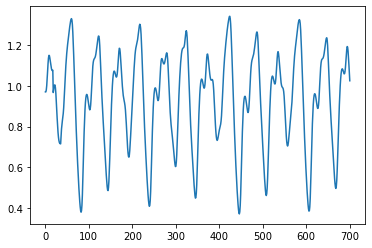

In [118]:
import matplotlib.pyplot as plt
plt.plot(lst)

In [96]:
#we define the constants in our equation
b = 0.1
c = 0.2
tau = 17
    
#then we define the next value z for the y sequence: z = y+1
#for instance the next value of the time serie after initialisation vector will be z:
n = 17

#in our function we will have something doing this:
u =np.zeros(682)
y =np.concatenate((y, u), axis =0)

#and something doing this for each index of y:
y[18] = y[17]-b*y[17] + (c*y[17-tau]/(1+(y[17-tau]**10)))

y[19] = y[18]-b*y[18] + (c*y[18-tau]/(1+(y[18-tau]**10)))

for i in enumerate(y):
    print(i)


# in python we can do both in the same time with the .append method.
# then instead of iterating on each index of y, we just append the result in a single object
# the simulation is optimised using recursive method


(0, 0.9697)
(1, 0.9699)
(2, 0.9794)
(3, 1.0003)
(4, 1.0319)
(5, 1.0703)
(6, 1.1076)
(7, 1.1352)
(8, 1.1485)
(9, 1.1482)
(10, 1.1383)
(11, 1.1234)
(12, 1.1072)
(13, 1.0928)
(14, 1.082)
(15, 1.0756)
(16, 1.0739)
(17, 1.0759)
(18, 1.080081535276462)
(19, 1.083770274326671)
(20, 0.0)
(21, 0.0)
(22, 0.0)
(23, 0.0)
(24, 0.0)
(25, 0.0)
(26, 0.0)
(27, 0.0)
(28, 0.0)
(29, 0.0)
(30, 0.0)
(31, 0.0)
(32, 0.0)
(33, 0.0)
(34, 0.0)
(35, 0.0)
(36, 0.0)
(37, 0.0)
(38, 0.0)
(39, 0.0)
(40, 0.0)
(41, 0.0)
(42, 0.0)
(43, 0.0)
(44, 0.0)
(45, 0.0)
(46, 0.0)
(47, 0.0)
(48, 0.0)
(49, 0.0)
(50, 0.0)
(51, 0.0)
(52, 0.0)
(53, 0.0)
(54, 0.0)
(55, 0.0)
(56, 0.0)
(57, 0.0)
(58, 0.0)
(59, 0.0)
(60, 0.0)
(61, 0.0)
(62, 0.0)
(63, 0.0)
(64, 0.0)
(65, 0.0)
(66, 0.0)
(67, 0.0)
(68, 0.0)
(69, 0.0)
(70, 0.0)
(71, 0.0)
(72, 0.0)
(73, 0.0)
(74, 0.0)
(75, 0.0)
(76, 0.0)
(77, 0.0)
(78, 0.0)
(79, 0.0)
(80, 0.0)
(81, 0.0)
(82, 0.0)
(83, 0.0)
(84, 0.0)
(85, 0.0)
(86, 0.0)
(87, 0.0)
(88, 0.0)
(89, 0.0)
(90, 0.0)
(91, 0.0)
(92, 0.0)

In [97]:
def mackay_glass(n):
    global y
    u = np.zeros(n-len(y))
    y = np.concatenate((y, u), axis=0)
    b = 0.1
    c = 0.2
    tau = 17
    
    for i in range(17, n-1):
             y[i+1] = y[i]-b*y[i] + (c*y[i-tau]/(1+(y[i-tau]**10)))

    for i in y:
        print(i)

In [98]:
mackay_glass(700)

0.9697
0.9699
0.9794
1.0003
1.0319
1.0703
1.1076
1.1352
1.1485
1.1482
1.1383
1.1234
1.1072
1.0928
1.082
1.0756
1.0739
1.0759
1.080081535276462
1.083770274326671
1.0834897762661928
1.0750207762543063
1.054638792956604
1.0211841624686446
0.9776902923416548
0.9297757621191423
0.882801686908462
0.8406091647977256
0.805483102768808
0.778411805565465
0.7593297906189446
0.7471376578928026
0.7400649588043391
0.7360716522127804
0.7331149014598091
0.7297044523772446
0.7250815842696968
0.7195661182661309
0.7147047025187202
0.7134642098800332
0.7201725401871111
0.7396092379112811
0.77440027875944
0.8223669604513408
0.8772649516242695
0.9324780795636951
0.9837161256845035
1.0292715021682093
1.0691125226945137
1.1039461083141822
1.134612556625171
1.161799131222437
1.1859490152716403
1.2073047554884024
1.2259906671047018
1.2421413813195399
1.2560644698462597
1.268435344403863
1.28041638738678
1.293389616606604
1.3077824323756166
1.3210936167719174
1.3271400014311807
1.3190027211370023
1.2935312546218

100 first terms of the expected serie
<img src="MackayTS_100.png" style="width:500px;height:300;">


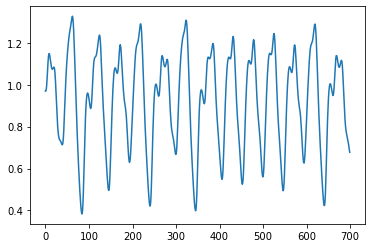

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(700), y)
plt.show()

Expected results:
<img src="MackayTS.png" style="width:500px;height:300;">


In [ ]:
del n, u, z, y

Examples of how to store on iterations:
Let's say we have a function which is defined as:  
$x[i+1] = x[i]+i$

In [4]:
# simulate an input vector x,
x = [1,2,3,4,5,6,7,8,9]

#now we want
for i in range(8):
    x[i+1] = x[i]+i
print(i)
print(x)
print(x[0])

7
[1, 1, 2, 4, 7, 11, 16, 22, 29]
1


In [5]:
print(type(x))
n = len(x)
print(n)

<class 'list'>
9


In [6]:
y = [0] * 21
print(type(y))
print(len(y))
print(y)
range(19)
del(n)

<class 'list'>
21
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
x
print(type(x))

<class 'list'>


In [14]:
y
len(y)
x = [1,2,3,4,5,6,7,8,9]

In [15]:
for n in range(8,19):
    x = np.append(x, (x[n]+1))

In [10]:
n=19
for n in range(8,n):
    x = np.append(x, (x[n]+1))

In [11]:
def x_app(x,n):
    for n in range(8,n):
        x = np.append(x, (x[n]+1))
    return(x)

In [12]:
x_app(x, 19)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20])